**DESCRIPTION**

Diabetes is a type of chronic disease which is more common among the
people of all age groups. Predicting this disease at an early stage can help
a person to take the necessary
accordingly to either prevent the occ
disease(For people who already have the disease).

**Task:**
1. Prepare the data-set
2. Build a model which 



1. Load libraries and read the data

    1.1. Load libraries

    1.2. Read the data

2. Overview

    2.1. Head

    2.2. Info

    2.3 describe

    2.3. Missing values

3. Replace missing values and EDA

    3.1. Insulin

    3.2. Glucose

    3.3. SkinThickness

    3.4. BloodPressure

    3.5. BMI

4. EDA

5. Prepare dataset split datset into feasture and Target

6. Machine Learning Model building and Evaution

    6.1 KNN Model

    6.2 Logistic Regression model

    6.3 SVM Model

    6.4 Decision Tree Model

  
7. Conclusion

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Internship ML Project/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**We have 768 instances and the following 8 attributes:**

Number of times pregnant (preg)

Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas)

Diastolic blood pressure in mm Hg (pres)

Triceps skin fold thickness in mm (skin)

2-Hour serum insulin in mu U/ml (insu)

Body mass index measured as weight in kg/(height in m)^2 (mass)

Diabetes pedigree function (pedi)

Age in years (age)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Exploratory Data Analysis**

**#Missing value**

We saw on data.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN :

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


Now, we can look at where are missing values :

In [ ]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data= [trace], layout=layout)
    py.iplot(fig)
    

In [ ]:
missing_plot(df, 'Outcome')

Missing values :

Insulin = 48.7% - 374

SkinThickness = 29.56% - 227

BloodPressure = 4.56% - 35

BMI = 1.43% - 11

Glucose = 0.65% - 5

In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy="mean")
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=si.fit_transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])

In [ ]:
missing_plot(df, 'Outcome')

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


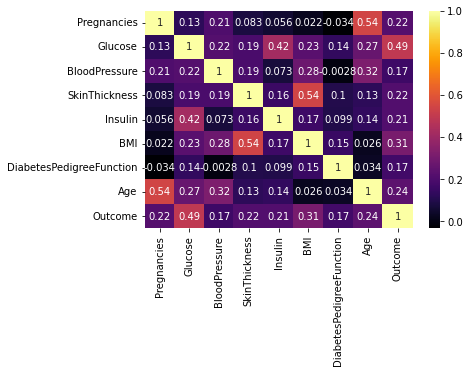

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='inferno')

It seems that Insulin is highly correlated with Glucose (about 0.42), BMI (about 0.17) and Age (about 0.14). It means that as the values of glucose, BMI and Age increase, the insuline is also increasing. It seems logical also that fat and aged people might have high level of insuline in their bodies.
In the same way SkinThickness is highly correlated with BMI (about 0.54).

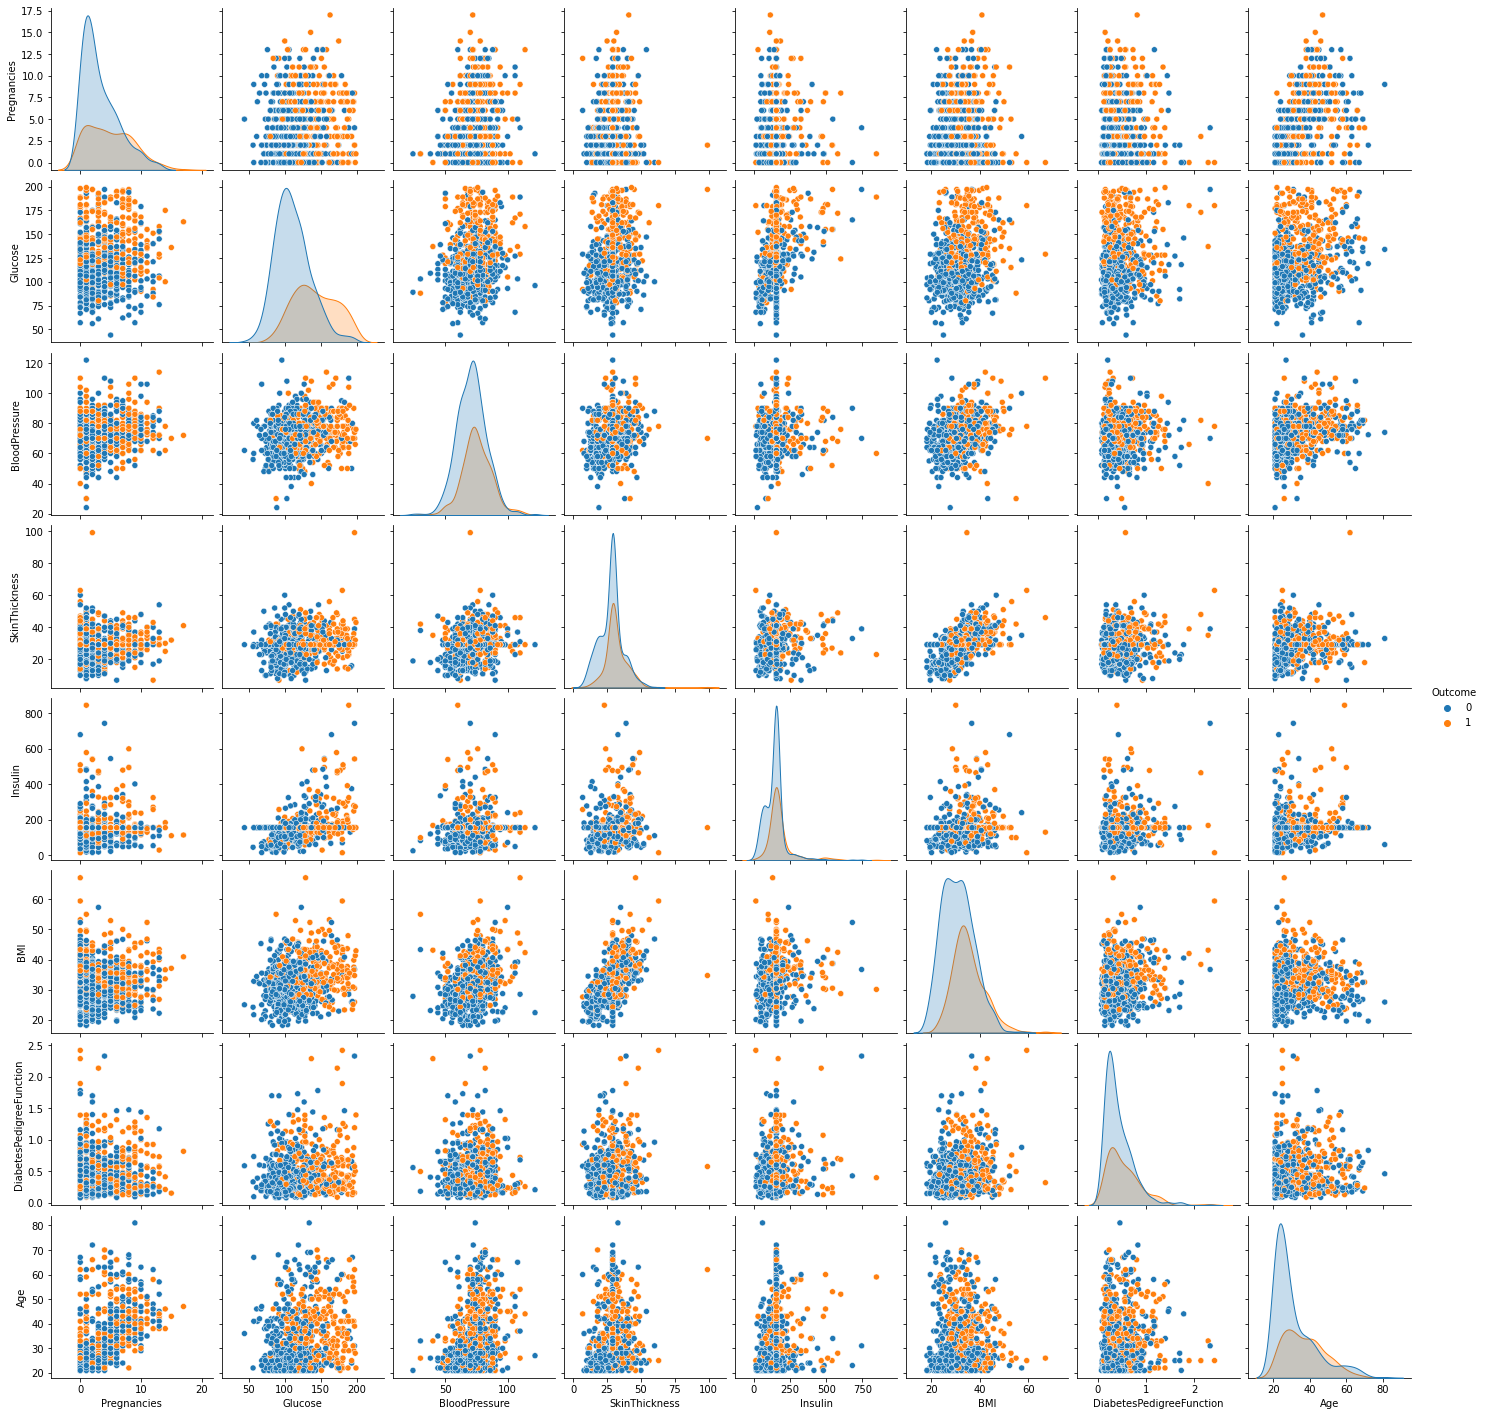

In [ ]:
sns.pairplot(df,hue="Outcome")

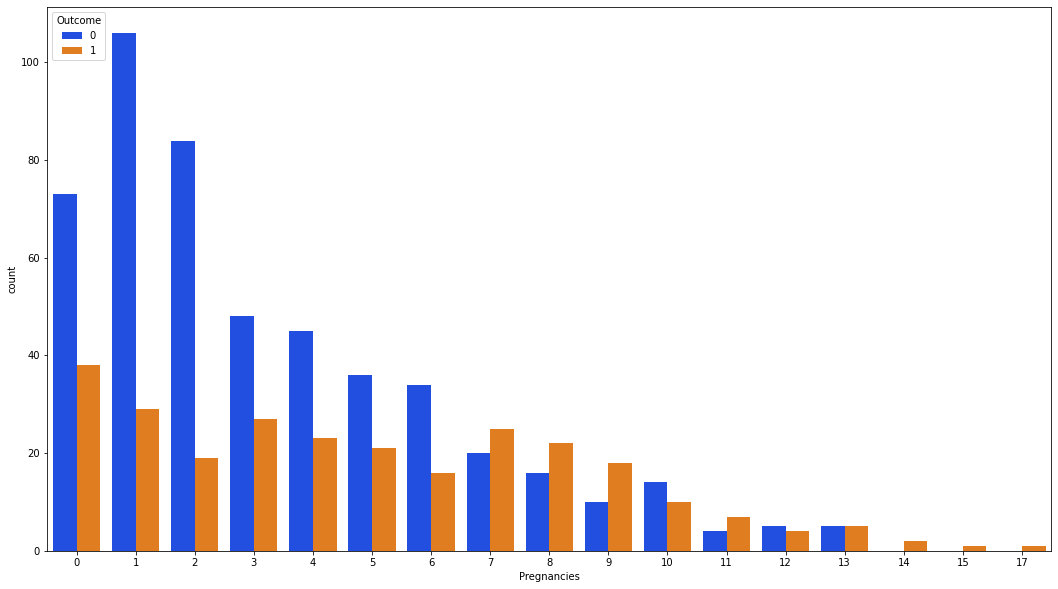

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x='Pregnancies',data=df,hue = 'Outcome', palette='bright')

Highlights

It is surprising that the median BMI does not immensely change as the number of pregnancies increases. I expected there to be a strong positive relationship between the number of pregnancies and the BMI. Those who tested positive for diabetes had higher BMIs than those who does not; yet, not a larger difference between the medians.

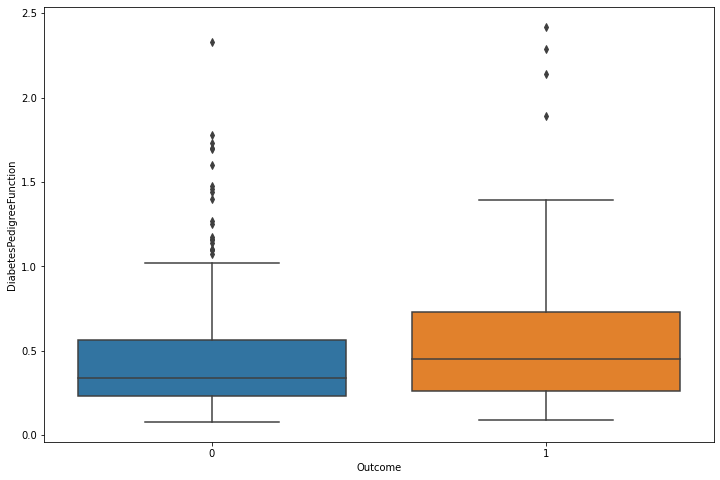

In [ ]:
#Pedigree function vs Diabetes
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction',data=df)

This graph more clearly shows the relationship between the pedigree function and the test results that the women got for diabetes. Since those who tested positive have a higher median and more high outliers, it is clear that the pedigree function does in fact, accurately help estimate the test results for diabetes. It shows that diabetes does follow genetics so those whose ancestors suffered from it have a higher risk of getting the disease themselves as well. Both test results show many outliers yet the outliers for those who tested negative seem to be lower pedigree functions than those who tested positive. This concluded that the genetic component is likely to contribute more to the emergence of diabetes in the Pima Indians and their offspring.

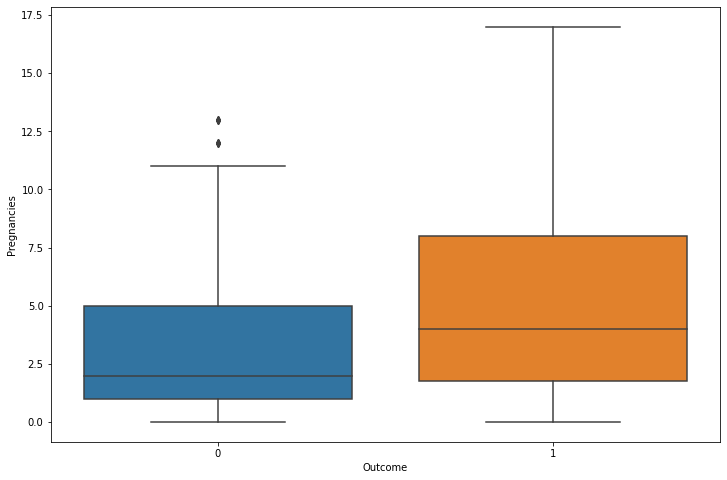

In [ ]:
#Pregnancy vs Diabetes

plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Pregnancies',data=df)

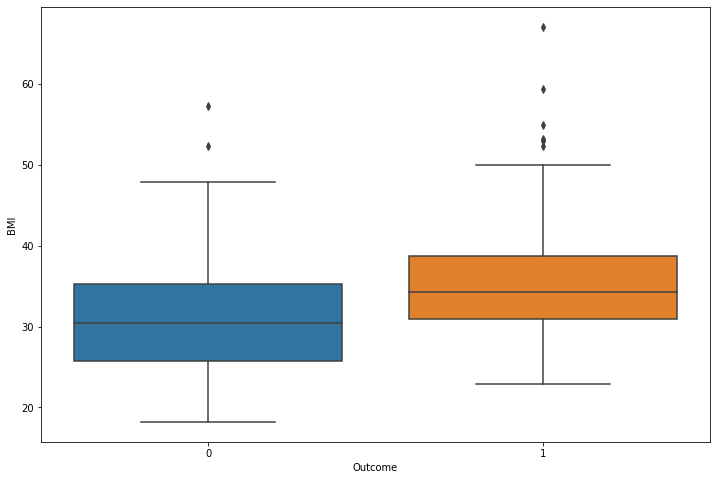

In [ ]:
#BMI vs Diabetes
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=df)

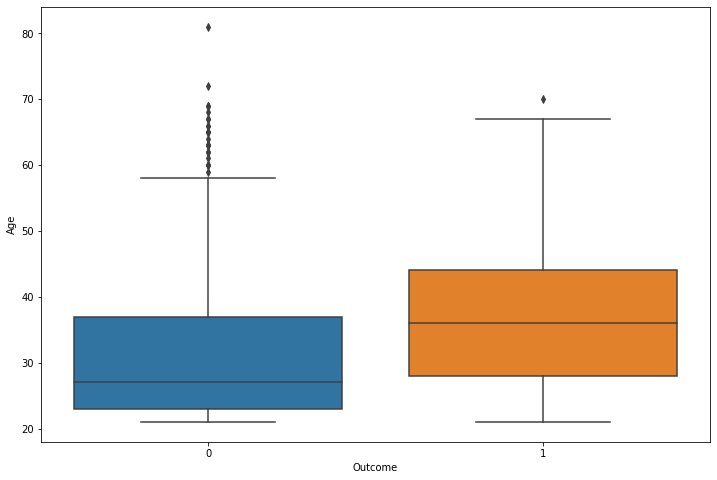

In [ ]:
#Age vs Diabetes

plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Age',data=df)

In [ ]:
df['Age'].value_counts().head()

22    72
21    63
25    48
24    46
23    38
Name: Age, dtype: int64

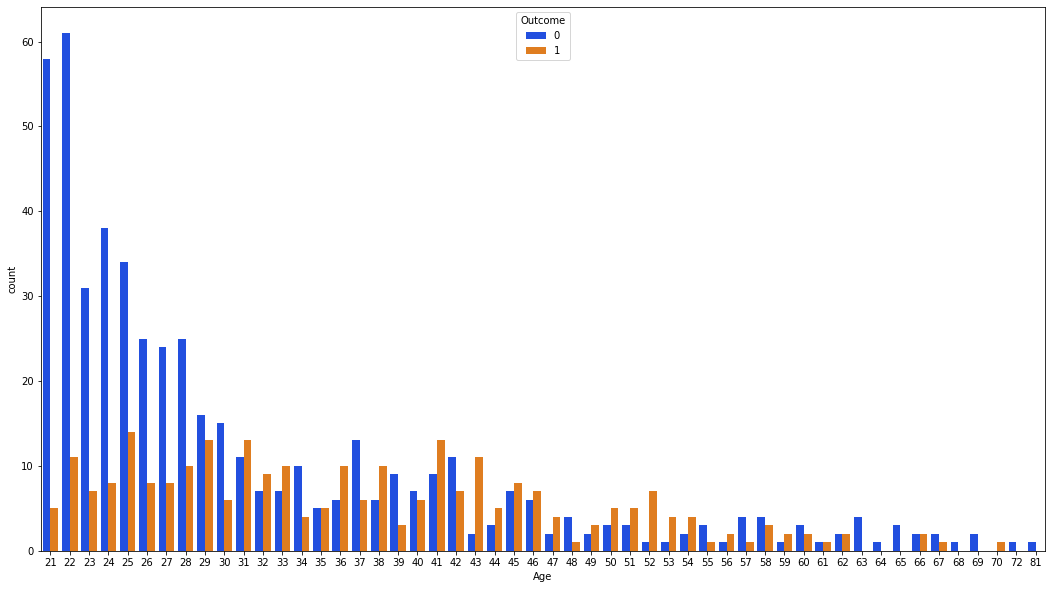

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x='Age',data=df,hue = 'Outcome', palette='bright')

Highlights

Significant relation can be seen between the age distribution and diabetic occurrence. Women at age group > 31 years were at higher risk to contract diabetes in comparison to the younger age group.

**#Spliting Training & testing Data**

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

**Model Building & Evalution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
def mymodel(model):
    #model creation
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #checking bias & variance
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    
    #model evaluation
    print(classification_report(ytest, ypred))
    return model

In [ ]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.7877094972067039
Testing Accuracy : 0.7575757575757576


              precision    recall  f1-score   support

           0       0.78      0.85      0.82       146
           1       0.70      0.60      0.65        85

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [ ]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.7690875232774674
Testing Accuracy : 0.7792207792207793


              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



In [ ]:
svm = mymodel(SVC())

Training Accuracy : 0.7672253258845437
Testing Accuracy : 0.7619047619047619


              precision    recall  f1-score   support

           0       0.75      0.94      0.83       146
           1       0.81      0.46      0.59        85

    accuracy                           0.76       231
   macro avg       0.78      0.70      0.71       231
weighted avg       0.77      0.76      0.74       231



In [ ]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.7575757575757576


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       146
           1       0.68      0.65      0.66        85

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



**Decision Tree Model gives Low Bias + High Varianece = Overfitting**

**Scaling data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [ ]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.813780260707635
Testing Accuracy : 0.7792207792207793


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       146
           1       0.74      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.78      0.78      0.77       231



In [ ]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.7653631284916201
Testing Accuracy : 0.7792207792207793


              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



In [ ]:
svm = mymodel(SVC())

Training Accuracy : 0.8230912476722533
Testing Accuracy : 0.7835497835497836


              precision    recall  f1-score   support

           0       0.77      0.93      0.84       146
           1       0.82      0.53      0.64        85

    accuracy                           0.78       231
   macro avg       0.80      0.73      0.74       231
weighted avg       0.79      0.78      0.77       231



In [ ]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.7575757575757576


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       146
           1       0.68      0.65      0.66        85

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



**After Scaling Decision Tree Model gives same result Low Bias + High Varianece = Overfitting**

In [ ]:
paramaters = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 20)),
    "min_samples_leaf": list(range(1, 20))
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), paramaters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [ ]:
grid.best_score_

0.7579958463136034

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=14)

In [ ]:
dt = mymodel(grid.best_estimator_)

Training Accuracy : 0.8100558659217877
Testing Accuracy : 0.8008658008658008


              precision    recall  f1-score   support

           0       0.83      0.86      0.85       146
           1       0.75      0.69      0.72        85

    accuracy                           0.80       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231



**Conclusion**

**After hyper Tuning my model Givers me Best fit Result i.e Low Bias + Low Varience = 80% Accuracy**